In [45]:
import sys
import os
from metient.metient import *
from metient.util import data_extraction_util as dutil

REPO_DIR = os.path.join(os.getcwd(), "../../")
TRACERX_DATA_DIR = os.path.join(REPO_DIR, 'data/tracerx_nsclc/')
PYCLONE_CLUSTERED_TSVS_DIR = os.path.join(TRACERX_DATA_DIR, 'patient_data', 'conipher_pyclone_clustered_phyloccf_anat_site_labels')
CONIPHER_TREES_DIR = os.path.join(TRACERX_DATA_DIR, 'conipher_outputs', 'TreeBuilding')
OUTPUT_DIR = os.path.join(TRACERX_DATA_DIR, "metient_outputs", "test")

def run_conipher_patient(patient, weights):
    space = "x"*44
    tsv_fn = os.path.join(PYCLONE_CLUSTERED_TSVS_DIR, f"{patient}_SNVs.tsv")
    print(tsv_fn)
    print(f"{space} PATIENT {patient} {space}")
    tree_fn = os.path.join(CONIPHER_TREES_DIR, f"{patient}_conipher_SNVsallTrees_cleaned.txt")
    trees = dutil.get_adj_matrices_from_all_conipher_trees(tree_fn)
    print_config = PrintConfig(visualize=True, verbose=False, k_best_trees=30)
    colors = ["#c27ba0", "#be5742e1", "#6fa8dc", "#e69138", "#d5b60a", "#6aa84f",]

    evaluate_label_clone_tree(trees[0], tsv_fn, weights, print_config, OUTPUT_DIR, patient, O=None,
                              bias_weights=True, custom_colors=colors,solve_polytomies=True, batch_size=1024)
    

  0%|          | 0/200 [00:00<?, ?it/s]

/lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/random/../../data/tracerx_nsclc/patient_data/conipher_pyclone_clustered_phyloccf_anat_site_labels/CRUK0484_SNVs.tsv
xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx PATIENT CRUK0484 xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
/lila/data/morrisq/divyak/projects/metient/metient/jupyter_notebooks/random/../../data/tracerx_nsclc/patient_data/conipher_pyclone_clustered_phyloccf_anat_site_labels/CRUK0484_SNVs.tsv
ordered_sites ['Scapula', 'Brain', 'Rib', 'Primary LN 1', 'Primary LN 2', 'Primary']


 50%|█████     | 100/200 [00:05<00:03, 30.52it/s]

poly_res.children_of_polys [14, 19, 21, 41, 11, 12, 44, 45, 16, 28, 48, 49, 30, 50, 51, 7, 8, 31]
poly_res.resolver_indices [33, 34, 35, 36, 37, 38, 39]
poly_res.resolver_index_to_parent_idx {33: 2, 34: 7, 35: 7, 36: 11, 37: 11, 38: 12, 39: 15}
33 [9, 14, 18, 21, 33, 41, 47, 53, 56, 59] True
19 [13, 19, 23, 27, 52, 57, 64] True
6 [6, 22, 24, 43, 60, 61] True
39 [8, 31, 39, 46, 68] True
38 [30, 38, 50, 67] True
37 [16, 37, 49, 54] True
36 [28, 36, 48, 65] True
1 [1, 26, 40, 63] True
4 [4, 17, 42, 55] True
25 [25, 62] True
35 [35, 45] True
34 [34, 44] True


100%|██████████| 200/200 [00:09<00:00, 21.71it/s]


all pars metrics {(13, 10, 5), (17, 14, 5), (24, 19, 6), (18, 12, 6), (16, 13, 4), (23, 15, 6), (23, 16, 5), (21, 13, 5), (18, 14, 6), (9, 7, 4), (19, 10, 4), (16, 12, 5), (20, 15, 5), (15, 14, 5), (22, 19, 6), (16, 13, 6), (20, 14, 6), (21, 12, 6), (10, 7, 4), (12, 9, 3), (23, 17, 5), (19, 13, 5), (24, 22, 6), (14, 12, 5), (19, 11, 5), (20, 16, 6), (18, 10, 4), (19, 15, 5), (14, 13, 6), (22, 15, 4), (17, 11, 4), (12, 9, 5), (19, 14, 6), (23, 18, 6), (11, 8, 4), (11, 9, 3), (26, 18, 5), (22, 17, 4), (13, 8, 5), (24, 17, 6), (17, 12, 5), (12, 11, 5), (19, 16, 6), (17, 13, 6), (11, 10, 4), (15, 10, 5), (12, 6, 2), (22, 15, 6), (7, 5, 2), (17, 15, 6), (11, 9, 5), (15, 12, 5), (22, 17, 6), (13, 10, 4), (13, 11, 3), (24, 19, 5), (18, 12, 5), (20, 13, 5), (15, 11, 6), (12, 7, 3), (23, 15, 5), (13, 9, 5), (21, 13, 4), (14, 10, 5), (18, 14, 5), (16, 12, 4), (25, 20, 6), (18, 15, 6), (10, 6, 2), (13, 10, 6), (23, 14, 6), (13, 11, 5), (22, 19, 5), (12, 10, 4), (20, 14, 5), (15, 13, 5), (22, 18, 

<Figure size 640x480 with 0 Axes>

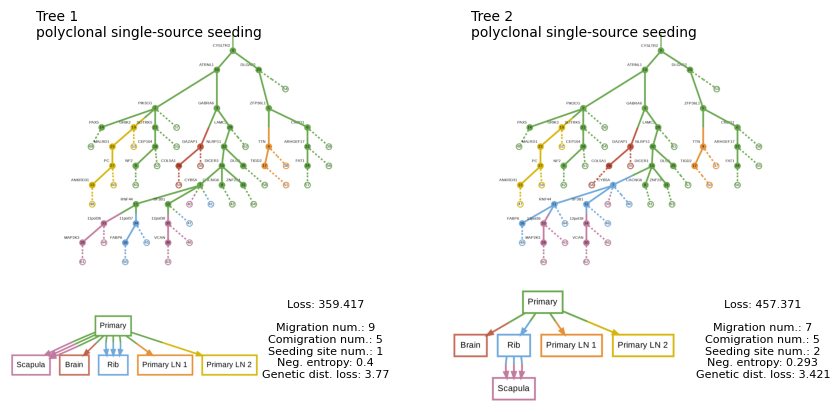

In [46]:
# %%prun
weights = Weights(mig=1, comig=50, seed_site=100, reg=2, gen_dist=0.1, organotrop=0.0)

run_conipher_patient("CRUK0484", weights)

In [55]:
from metient.util import plotting_util as putil
from metient.util import vertex_labeling_util as vutil
from networkx.drawing.nx_pydot import to_pydot
from metient.util.globals import *
import networkx as nx
import matplotlib.pyplot as plt
import pygraphviz as pgv
from PIL import Image as PILImage
import io

def plot_tree(V, T, gen_dist, ordered_sites, custom_colors, display_node_idx_to_label, output_name, all_white=False):

    # (1) Create full directed graph 
    
#     # these labels are used for display in plotting
#     display_node_idx_to_label_map = putil.get_full_tree_node_idx_to_label(V, T, custom_node_idx_to_label, ordered_sites,
#                                                                     shorten_label=True, to_string=True)
#     # these labels are used for writing out full vertex names to file
#     full_node_idx_to_label_map = putil.get_full_tree_node_idx_to_label(V, T, custom_node_idx_to_label, ordered_sites,
#                                                                  shorten_label=False, to_string=False)
    color_map = { i:putil.idx_to_color(custom_colors, (V[:,i] == 1).nonzero()[0][0].item()) for i in range(V.shape[1])}
    G = nx.DiGraph()
    node_options = {"label":"", "shape": "circle", "penwidth":4, 
                    "fontname":"Arial", "fontsize":"14pt",
                    "fixedsize":"true", "height":0.28}
    
    neutral = "darkgrey"
    for i, j in vutil.tree_iterator(T):
        label_i, _ = display_node_idx_to_label[i]
        label_j, is_leaf = display_node_idx_to_label[j]
        
        color_i = 'white' if all_white else color_map[i]
        edge_color_i = neutral if all_white else color_map[i]
        G.add_node(i, xlabel=label_i, fillcolor=color_i, 
                    color=edge_color_i, style="filled", **node_options)
        color_j = 'white' if all_white and not is_leaf else color_map[j]
        edge_color_j = neutral if all_white and not is_leaf else color_map[j]
        G.add_node(j, xlabel="" if is_leaf else label_j, fillcolor=color_j, 
                    color=edge_color_j, style="filled", **node_options)

        style = "dashed" if is_leaf else "solid"
        penwidth = 5

        minlen = 1.0
        edge_color = neutral if all_white else f'"{color_map[i]};0.5:{color_map[j]}"'
        G.add_edge(i, j,color=edge_color, penwidth=penwidth, arrowsize=0, 
                   style=style, minlen=minlen)


    # Add edge from normal to root 
    root_idx = vutil.get_root_index(T)
    root_label = display_node_idx_to_label[root_idx][0]
    root_color = neutral if all_white else f'"{color_map[root_idx]}"'
    G.add_node("normal", label="", xlabel=root_label, penwidth=3, style="invis")
    G.add_edge("normal", root_idx, label="", 
                color=root_color, 
                penwidth=penwidth, arrowsize=0, style="solid")

    dot = to_pydot(G).to_string().split("\n")
    dot.insert(1, 'graph[splines=false]; nodesep=0.7; rankdir=TB; ranksep=0.6; forcelabels=true; dpi=600; size=2.5;')
    dot_str = ("\n").join(dot)
    tree = pgv.AGraph(string=dot_str).draw(format="png", prog="dot", args="-Glabel=\"\"")
    tree = PILImage.open(io.BytesIO(tree))
    plt.imshow(tree)
    plt.axis('off') 
    plt.savefig(os.path.join(OUTPUT_DIR,f'{output_name}.png'), dpi=500)  # Specify the filename and the resolution in DPI

    

In [12]:
sites

['Scapula', 'Brain', 'Rib', 'Primary LN 1', 'Primary LN 2', 'Primary']

/scratch/lsftmp/6553007.tmpdir/ipykernel_1574/2609449176.py:59: DeprecationWarning: nx.nx_pydot.to_pydot depends on the pydot package, which hasknown issues and is not actively maintained.

See https://github.com/networkx/networkx/issues/5723
  dot = to_pydot(G).to_string().split("\n")


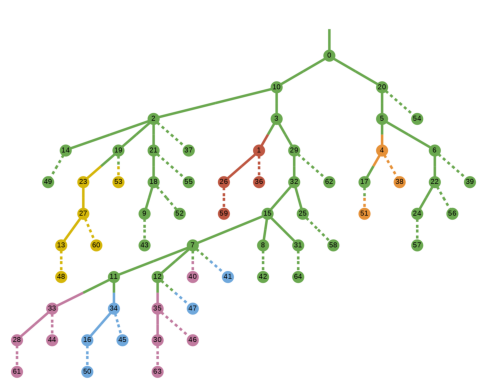

In [66]:
import gzip
import pickle
colors = ["#c27ba0", "#be5742e1", "#6fa8dc", "#e69138", "#d5b60a", "#6aa84f",]

with gzip.open(os.path.join(OUTPUT_DIR, f"CRUK0484_Primary.pkl.gz"),'rb') as f:
    pckl = pickle.load(f)
V = pckl[OUT_LABElING_KEY][0]
T = pckl[OUT_ADJ_KEY][0]
idx_to_label = pckl[OUT_IDX_LABEL_KEY][0]
display_idx_to_label = {}
for i in idx_to_label:
    display_idx_to_label[i] = ('',idx_to_label[i][1])
sites = pckl[OUT_SITES_KEY]
V_mistake = V
V_mistake[4,19] = 0
V_mistake[5,19] = 1
V_mistake[3,17] = 0
V_mistake[5,17] = 1
plot_tree(V_mistake,T,None,sites,colors,display_idx_to_label, "CRUK0484_mistake", all_white=False)


In [63]:
#V_mistake = V[:19]

V_mistake[:,19]

array([0., 0., 0., 0., 0., 1.], dtype=float32)